In [2]:
from dont_patronize_me import DontPatronizeMe
dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
df = dpm.train_task1_df
df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

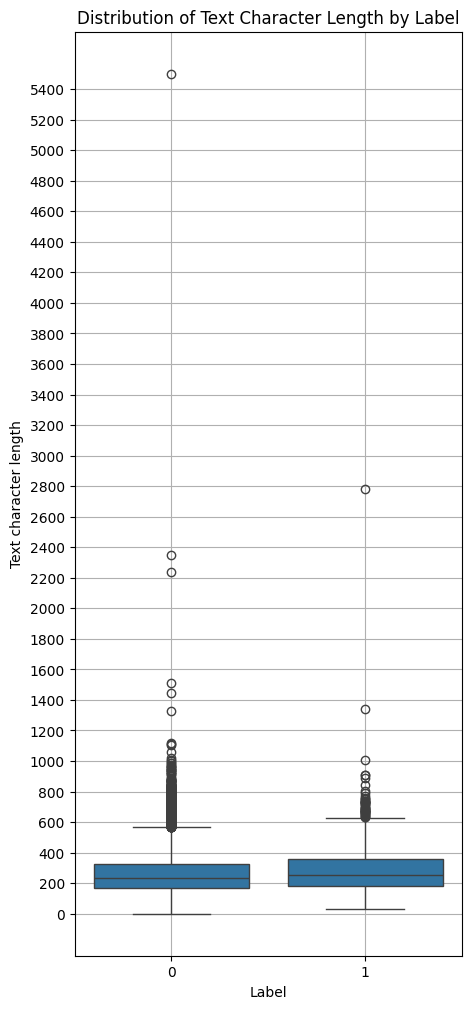

In [4]:
text_lengths = [len(text) for text in df['text']]

# Convert to DataFrame
df_text_lens = pd.DataFrame({"Label": df['label'], "Text character length": text_lengths})

# Create a boxplot
plt.figure(figsize=(5, 12))
sns.boxplot(x="Label", y="Text character length", data=df_text_lens)
plt.title("Distribution of Text Character Length by Label")
plt.grid(True)
y_min, y_max = min(text_lengths), max(text_lengths)
plt.yticks(np.arange(y_min, y_max + 1, step=200))

plt.show()

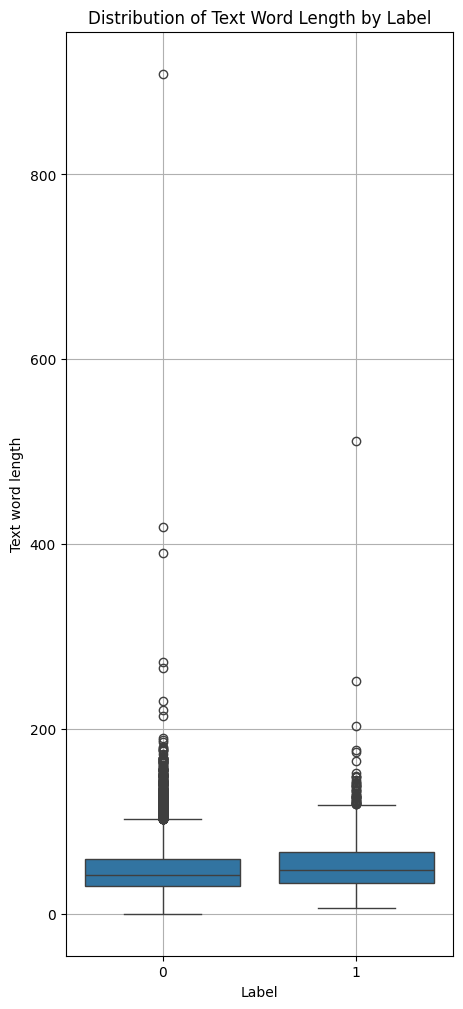

In [5]:
text_lengths = [len(text.split()) for text in df['text']]

# Convert to DataFrame
df_text_lens = pd.DataFrame({"Label": df['label'], "Text word length": text_lengths})

# Create a boxplot
plt.figure(figsize=(5, 12))
sns.boxplot(x="Label", y="Text word length", data=df_text_lens)
plt.title("Distribution of Text Word Length by Label")
plt.grid(True)
y_min, y_max = min(text_lengths), max(text_lengths)
plt.yticks(np.arange(y_min, y_max + 1, step=200))

plt.show()

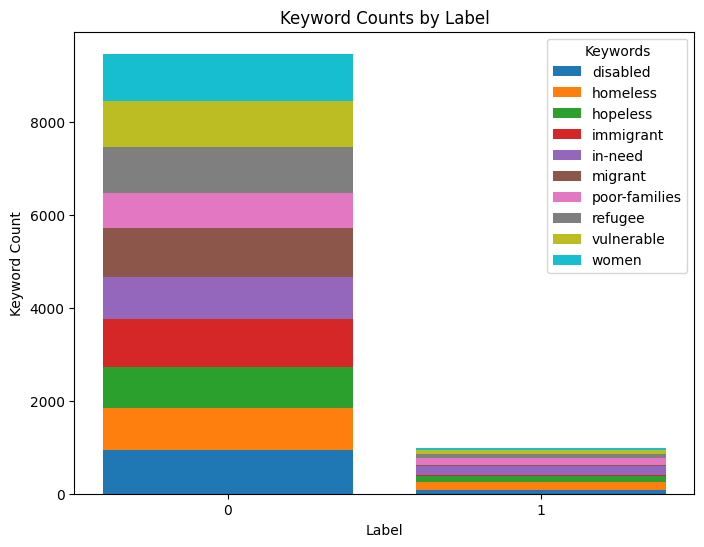

In [ ]:
# Count occurrences of each keyword for each label
keyword_counts = df.groupby(["label", "keyword"]).size().unstack(fill_value=0)

# Define labels (x-axis) and keywords (stacked categories)
labels = keyword_counts.index  # 0 and 1
keywords = keyword_counts.columns  # Unique keywords

# Plot stacked bars
plt.figure(figsize=(8, 6))
bottom = np.zeros(len(labels))  # Initialize bottom for stacking

for i, keyword in enumerate(keywords):
    plt.bar(labels, keyword_counts[keyword], bottom=bottom, label=keyword)
    bottom += keyword_counts[keyword]  # Update bottom for stacking

# Customize labels and legend
plt.xlabel("Label")
plt.ylabel("Keyword Count")
plt.title("Keyword Counts by Label")
plt.xticks(labels, ["0", "1"])  # Rename x-axis labels
plt.legend(title="Keywords")

# Show plot
plt.show()


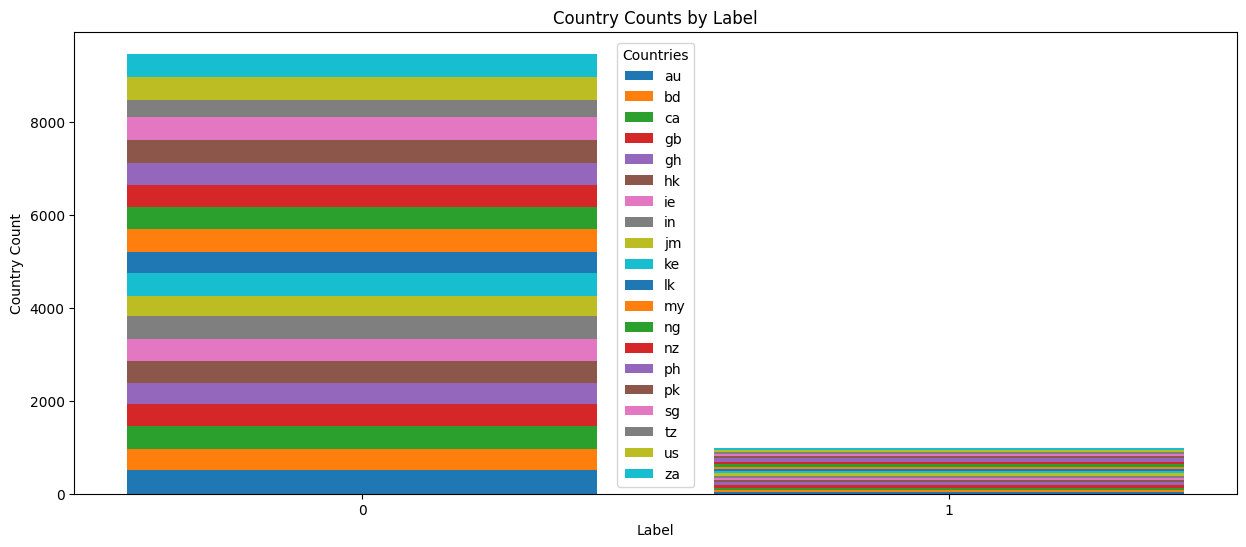

In [ ]:
# Count occurrences of each country for each label
country_counts = df.groupby(["label", "country"]).size().unstack(fill_value=0)

# Define labels (x-axis) and countries (stacked categories)
labels = country_counts.index  # 0 and 1
countries = country_counts.columns  # Unique countries

# Plot stacked bars
plt.figure(figsize=(15, 6))
bottom = np.zeros(len(labels))  # Initialize bottom for stacking

for i, country in enumerate(countries):
    plt.bar(labels, country_counts[country], bottom=bottom, label=country)
    bottom += country_counts[country]  # Update bottom for stacking

# Customize labels and legend
plt.xlabel("Label")
plt.ylabel("Country Count")
plt.title("Country Counts by Label")
plt.xticks(labels, ["0", "1"])  # Rename x-axis labels
plt.legend(title="Countries")

# Show plot
plt.show()
